In [1]:
# processing arrays and displaying csv file data

import pandas as pd
import numpy as np

In [2]:
#importing an image file 
import skimage.io as io

In [3]:
#Machine Learning tools/ kit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True   
from PIL import Image
import pickle

Image Training

In [5]:
imagesDF=pd.read_csv("labels.csv") 
imagesDF=imagesDF.drop(imagesDF.columns[0], axis=1)  # as the first column is redundant we remove it

In [6]:

imagesDF["overall_sentiment"]=imagesDF["overall_sentiment"].map({"neutral":0, "positive":1, "very_positive":1, "negative":-1, "very_negative":-1})    #assigning sentiment their respective values.
imagesDF=imagesDF.sort_values(by=["overall_sentiment"], ascending=True)
imagesDF=imagesDF.reset_index(drop=True) 
imagesDF

,image_name,text_ocr,text_corrected,overall_sentiment
0,image_5871.jpg,"DATHI WHAT IS WITH ""HER NECK ANYWAY? imgflip.com","DATHI WHAT IS WITH ""HER NECK ANYWAY? imgflip.com",-1
1,image_648.jpg,TODAY I'M DOING NOTHING,TODAY I'M DOING NOTHING BECAUSE I STARTED DOI...,-1
2,image_6590.jpg,MY TEST RESULTS CAME BACK NEGATIVE FOR THE FLU...,MY TEST RESULTS CAME BACK NEGATIVE FOR THE FLU...,-1
3,image_3522.png,Adorable puppy seal Weird Wor,Adorable puppy seal Weird Wor,-1
4,image_4903.png,I'm kinda getting sick of Grumpy Cat memes Fm ...,I'm kinda getting sick of Grumpy Cat memes Fm ...,-1
...,...,...,...,...
6987,image_2914.jpg,HAPPY BIRTHDAY GREG & BRIAN,HAPPY BIRTHDAY GREG & BRIAN,1
6988,image_2912.png,GETS CIRCUMCISED WAKES UP WITHA VAGINA,GETS CIRCUMCISED WAKES UP WITHA VAGINA,1
6989,image_2911.jpg,GETS GROUPED WITH THE FOUR HOTTEST MEME GIRLS ...,GETS GROUPED WITH THE FOUR HOTTEST MEME GIRLS ...,1
6990,image_2945.png,OHH LOOK! MOM'S LAST NERVE I WANT TO TOUCH IT!!,OHH LOOK! MOM'S LAST NERVE I WANT TO TOUCH IT!!,1


In [7]:
imgList=[]
for i in range(len(imagesDF)):
    image=io.imread("images/"+imagesDF["image_name"][i])
    imgList.append(image)

C:\Users\x\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


PreProcessing of image

In [9]:

imagesTraining, imagesTesting, labelsTraining, labelsTesting=train_test_split(imgList, imagesDF["overall_sentiment"], test_size=0.2, random_state=42)
Y_Train=labelsTraining
Y_Test=labelsTesting

In [10]:
#converting images to 28x28 format
X_Train=[]
for i in range(len(imagesTraining)):
    X_Train.append(np.array(Image.fromarray(imagesTraining[i]).convert("L").resize((28, 28))))


In [11]:
X_Test=[]
for i in range(len(imagesTesting)):
    X_Test.append(np.array(Image.fromarray(imagesTesting[i]).convert("L").resize((28, 28))))


In [12]:
#normalization of data
X_Train=np.array(X_Train)/255.0
X_Test=np.array(X_Test)/255.0

In [13]:



numberOfSamples, numOfX, numOfY=X_Train.shape
X_Train=X_Train.reshape((numberOfSamples, numOfX*numOfY))

numberOfSamples, numOfX, numOfY=X_Test.shape
X_Test=X_Test.reshape((numberOfSamples, numOfX*numOfY))

Training the model using RandomForestClassifier

In [14]:
RandomForestClassifier_model=RandomForestClassifier() 
RandomForestClassifier_model.fit(X_Train, labelsTraining)


RandomForestClassifier()

the predicted output class is a class with the maximum votes->hardVoting
the predicted output class is predicted using average probability-> softVoting



In [15]:

RandomForestClassifier_HardVoting=VotingClassifier(estimators=[("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42))], voting="hard")
RandomForestClassifier_SoftVoting=VotingClassifier(estimators=[("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42))], voting="soft")


In [16]:
RandomForestClassifier_HardVoting.fit(X_Train, labelsTraining)
RandomForestClassifier_SoftVoting.fit(X_Train, labelsTraining)


VotingClassifier(estimators=[('RandomForestClassifier',
                              RandomForestClassifier(random_state=42))],
                 voting='soft')

In [17]:
HardPredictions_RandomForestClassifier=RandomForestClassifier_HardVoting.predict(X_Test)
SoftPredictions_RandomForestClassifier=RandomForestClassifier_SoftVoting.predict(X_Test)


In [18]:

RandomForestClassifier_HardVotingScore=accuracy_score(labelsTesting, HardPredictions_RandomForestClassifier)
RandomForestClassifier_SoftVotingScore=accuracy_score(labelsTesting, SoftPredictions_RandomForestClassifier)

print("Hard Voting: ", RandomForestClassifier_HardVotingScore*100, "%")
print("Soft Voting: ", RandomForestClassifier_SoftVotingScore*100, "%")

Hard Voting:  58.041458184417436 %
Soft Voting:  58.041458184417436 %


In [19]:
RandomForestClassifierPrediction=RandomForestClassifier_model.predict(X_Test) #   Predicting the labels of the testing images.
RandomForestClassifierPrediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
RandomForestClassifier_score=accuracy_score(labelsTesting, RandomForestClassifierPrediction)    #   Calculating the accuracy of the model.
print(classification_report(labelsTesting, RandomForestClassifierPrediction))   #   Printing the classification report of the model.
print("Accuracy: ", RandomForestClassifier_score*100, "%")
f1Score = RandomForestClassifier() 
f1Score.fit(X_Train, labelsTraining)
y_predRandomForestClassifier=f1Score.predict(X_Test)
print("F1 Score: ",f1_score(labelsTesting, y_predRandomForestClassifier,average='macro',)*100) 

C:\Users\x\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\x\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\x\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       146
           0       0.27      0.04      0.07       431
           1       0.58      0.95      0.72       822

    accuracy                           0.57      1399
   macro avg       0.28      0.33      0.26      1399
weighted avg       0.42      0.57      0.44      1399

Accuracy:  56.754824874910646 %
F1 Score:  40.26108201349416


In [21]:
confusion_matrix(labelsTesting, RandomForestClassifierPrediction)   

array([[  0,   2, 144],
       [  0,  17, 414],
       [  0,  45, 777]], dtype=int64)

DecisionTreeClassifier

In [31]:
dt_model=DecisionTreeClassifier()   #   Creating an instance of the DecisionTreeClassifier class.
dt_model.fit(X_Train, labelsTraining)

DecisionTreeClassifier()

In [ ]:
HardVotingDecisionTree=VotingClassifier(estimators=[("dt", DecisionTreeClassifier())], voting="hard")
SoftVotingDecisionTree=VotingClassifier(estimators=[("dt", DecisionTreeClassifier())], voting="soft")


In [ ]:
HardVotingDecisionTree.fit(X_Train, labelsTraining)
SoftVotingDecisionTree.fit(X_Train, labelsTraining)


In [ ]:

HardPredictionsDecisionTree=HardVotingDecisionTree.predict(X_Test)
SoftPredictionsDecisionTree=SoftVotingDecisionTree.predict(X_Test)

In [32]:

HardVotingScoreDecisionTree=accuracy_score(labelsTesting, HardPredictionsDecisionTree)
SoftVotingScoreDecisionTree=accuracy_score(labelsTesting, SoftPredictionsDecisionTree)

print("Hard Voting: ", HardVotingScoreDecisionTree*100, "%")
print("Soft Voting: ", SoftVotingScoreDecisionTree*100, "%")

Hard Voting:  44.17441029306647 %
Soft Voting:  44.31736954967834 %


In [33]:
DecisionTreePredictions=dt_model.predict(X_Test) #   Predicting the labels of the testing images.
DecisionTreePredictions

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
DecisionTreeScores=accuracy_score(labelsTesting, DecisionTreePredictions)    #   Calculating the accuracy of the model.
print(classification_report(labelsTesting, DecisionTreePredictions))   #   Printing the classification report of the model.
print("Accuracy: ", DecisionTreeScores*100, "%")
f1Score = DecisionTreeClassifier() 
f1Score.fit(X_Train, labelsTraining)
y_predDecisionTreeClassifier=f1Score.predict(X_Test)
print("F1 Score: ",f1_score(labelsTesting, y_predDecisionTreeClassifier,average='macro',)*100) 

              precision    recall  f1-score   support

          -1       0.11      0.10      0.10       146
           0       0.33      0.38      0.35       431
           1       0.58      0.54      0.56       822

    accuracy                           0.45      1399
   macro avg       0.34      0.34      0.34      1399
weighted avg       0.46      0.45      0.45      1399

Accuracy:  44.603288062902074 %
F1 Score:  44.07000721589427


In [35]:
confusion_matrix(labelsTesting, DecisionTreePredictions)

array([[ 15,  42,  89],
       [ 40, 162, 229],
       [ 87, 288, 447]], dtype=int64)

K Nearest Neighbour Model

In [22]:
KNNModel=KNeighborsClassifier(n_neighbors=3)   #   Creating an instance of the KNeighborsClassifier class.
KNNModel.fit(X_Train, labelsTraining)  

KNeighborsClassifier(n_neighbors=3)

In [23]:
#data training
HardVotingknn=VotingClassifier(estimators=[("knn", KNeighborsClassifier(n_neighbors=3))], voting="hard")
SoftVotingknn=VotingClassifier(estimators=[("knn", KNeighborsClassifier(n_neighbors=3))], voting="soft")


In [24]:
#data prediction
HardVotingknn.fit(X_Train, labelsTraining)
SoftVotingknn.fit(X_Train, labelsTraining)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft')

In [25]:

HardPerdictionsKNN=HardVotingknn.predict(X_Test)
SoftPerdictionsKNN=SoftVotingknn.predict(X_Test)


In [26]:
#accuracy calculation

HardVotingscore_knn=accuracy_score(labelsTesting, HardPerdictionsKNN)
SoftVotingscore_knn=accuracy_score(labelsTesting, SoftPerdictionsKNN)

print("Hard Voting: ", HardVotingscore_knn*100, "%")
print("Soft Voting: ", SoftVotingscore_knn*100, "%")

Hard Voting:  45.46104360257326 %
Soft Voting:  45.46104360257326 %


In [27]:
from sklearn.metrics import f1_score
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_Train, labelsTraining)
y_predKNeighborsClassifier=neigh.predict(X_Test)
print("F1 Score: ",f1_score(labelsTesting, y_predKNeighborsClassifier,average='macro',)*100) 
print('Accuracy:', accuracy_score(labelsTesting, y_predKNeighborsClassifier)) 


Accuracy: 0.3688348820586133
F1 Score:  31.835048916033454


In [28]:
KNNPredictions=KNNModel.predict(X_Test)   #   Predicting the labels of the testing images.
KNNPredictions

array([ 1,  0,  0, ...,  1,  0, -1], dtype=int64)

In [29]:
KNNScore=accuracy_score(labelsTesting, KNNPredictions)  #   Calculating the accuracy of the model.
print(classification_report(labelsTesting, KNNPredictions))    #   Printing the classification report of the model.
print("Accuracy: ", KNNScore*100, "%")

              precision    recall  f1-score   support

          -1       0.12      0.14      0.13       146
           0       0.28      0.19      0.23       431
           1       0.58      0.65      0.61       822

    accuracy                           0.45      1399
   macro avg       0.32      0.33      0.32      1399
weighted avg       0.44      0.45      0.44      1399

Accuracy:  45.46104360257326 %


In [30]:
confusion_matrix(labelsTesting, KNNPredictions) 

array([[ 21,  30,  95],
       [ 58,  84, 289],
       [102, 189, 531]], dtype=int64)

In [36]:
image_path="download.jpeg"   
image=Image.open(image_path)   

Testing the Learning Algorithm on a random Meme image


Image:


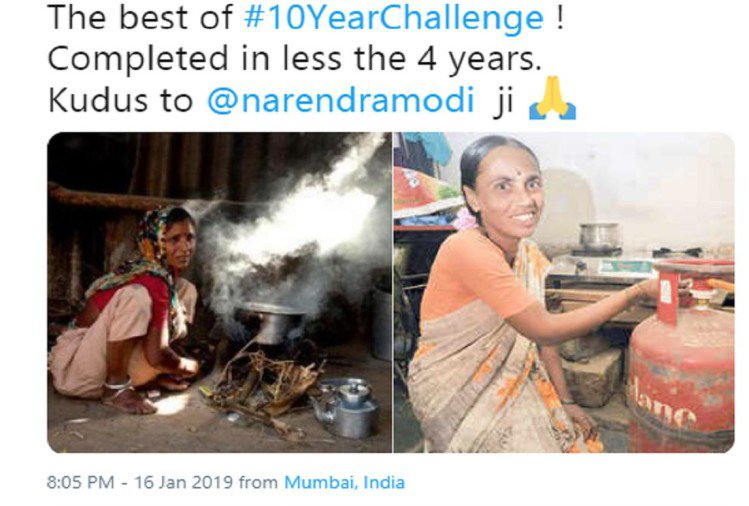

In [37]:

print("Image:")
image

In [ ]:
image=image.convert("L")    #image to grayScale.
image=image.resize((28, 28)) 
image=np.array(image) 

In [ ]:

image=np.array(image)/255.0 
numOfX, numOfY=image.shape 
image=image.reshape((1, numOfX*numOfY))#image to 1d array

In [ ]:

classes=["neutral", "positive", "very_positive", "negative", "very_negative"]  
answer=RandomForestClassifier_model.predict(image)  

In [38]:

print("Predicted:", classes[answer[0]])

Predicted: positive


In [39]:
DFText=pd.read_csv("labels.csv")
DFText=DFText.drop(DFText.columns[0], axis=1) 
DFText

,image_name,text_ocr,text_corrected,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral
...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,very_positive


OneHotEncoding 

In [40]:
OneHotEncodingDFText=pd.get_dummies(DFText, columns=["overall_sentiment"])    
OneHotEncodingDFText

,image_name,text_ocr,text_corrected,overall_sentiment_negative,overall_sentiment_neutral,overall_sentiment_positive,overall_sentiment_very_negative,overall_sentiment_very_positive
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,0,0,0,0,1
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,0,0,0,0,1
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,0,0,1,0,0
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,0,0,1,0,0
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,0,1,0,0,0
...,...,...,...,...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,0,1,0,0,0
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,0,1,0,0,0
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,0,0,1,0,0
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,0,0,0,0,1


In [ ]:
vectorizer=CountVectorizer()    
x=vectorizer.fit_transform(OneHotEncodingDFText["text_corrected"].values.astype("U"))   
y=OneHotEncodingDFText[["overall_sentiment_negative", "overall_sentiment_neutral", "overall_sentiment_positive", "overall_sentiment_very_negative", "overall_sentiment_very_positive"]].values 
X_Train, X_Test, Y_Train, Y_Test=train_test_split(x, y, test_size=0.2, random_state=42)    #   Splitting the data 


In [41]:


Y_Test=np.argmax(Y_Test, axis=1)
Y_Train=np.argmax(Y_Train, axis=1)



X_Train=X_Train.toarray()
X_Test=X_Test.toarray()

GaussianNB model

In [42]:
GaussianNBclassModel=GaussianNB()  
GaussianNBclassModel.fit(X_Train, Y_Train) 

GaussianNB()

In [ ]:
HardVotingnbc=VotingClassifier(estimators=[("nbc", GaussianNB())], voting="hard")
SoftVotingnbc=VotingClassifier(estimators=[("nbc", GaussianNB())], voting="soft")


In [ ]:

HardVotingnbc.fit(X_Train, Y_Train)
SoftVotingnbc.fit(X_Train, Y_Train)

In [ ]:
HardPredictions_nbc=HardVotingnbc.predict(X_Test)
SoftPredictions_nbc=SoftVotingnbc.predict(X_Test)


In [43]:

HardVotingscore_nbc=accuracy_score(Y_Test, HardPredictions_nbc)
SoftVotingscore_nbc=accuracy_score(Y_Test, SoftPredictions_nbc)

print("Hard Voting: ", HardVotingscore_nbc*100, "%")
print("Soft Voting: ", SoftVotingscore_nbc*100, "%")

Hard Voting:  26.590421729807005 %
Soft Voting:  26.590421729807005 %


In [44]:
GaussianNBclasspredictions=GaussianNBclassModel.predict(X_Test)   #   Predicting the labels of the testing data.
GaussianNBclasspredictions

array([1, 4, 0, ..., 4, 3, 2], dtype=int64)

In [60]:
GaussianNBclassScore=accuracy_score(Y_Test, GaussianNBclasspredictions)   #   Calculating the accuracy of the model.
print(classification_report(Y_Test, GaussianNBclasspredictions))   #   Printing the classification report of the model.
print("Accuracy: ", GaussianNBclassScore*100, "%")
f1Score = GaussianNB()
f1Score.fit(X_Train, labelsTraining)
y_predGaussianNBClassifier=f1Score.predict(X_Test)
print("F1 Score: ",f1_score(labelsTesting, y_predGaussianNBClassifier,average='macro',)*100) 

              precision    recall  f1-score   support

           0       0.08      0.13      0.10       113
           1       0.29      0.31      0.30       427
           2       0.41      0.29      0.34       612
           3       0.02      0.03      0.02        33
           4       0.17      0.23      0.20       214

    accuracy                           0.27      1399
   macro avg       0.20      0.20      0.19      1399
weighted avg       0.30      0.27      0.28      1399

Accuracy:  26.590421729807005 %
F1 Score:  42.19715224531888


In [46]:
confusion_matrix(Y_Test, GaussianNBclasspredictions)   

array([[ 15,  31,  39,   5,  23],
       [ 48, 131, 144,  14,  90],
       [ 76, 218, 176,  26, 116],
       [  9,   8,  11,   1,   4],
       [ 33,  65,  56,  11,  49]], dtype=int64)

Logistic Regression Model


In [52]:
lr=LogisticRegression(solver="lbfgs", max_iter=1000) 
lr.fit(X_Train, Y_Train)   

LogisticRegression(max_iter=1000)

In [ ]:

HardVotinglr=VotingClassifier(estimators=[("lr", LogisticRegression(solver="lbfgs", max_iter=1000))], voting="hard")
SoftVotinglr=VotingClassifier(estimators=[("lr", LogisticRegression(solver="lbfgs", max_iter=1000))], voting="soft")


In [ ]:
HardVotinglr.fit(X_Train, Y_Train)
SoftVotinglr.fit(X_Train, Y_Train)


In [ ]:
HardPredictions_lr=HardVotinglr.predict(X_Test)
SoftPredictions_lr=SoftVotinglr.predict(X_Test)


In [53]:


HardVotingscore_lr=accuracy_score(Y_Test, HardPredictions_lr)
SoftVotingscore_lr=accuracy_score(Y_Test, SoftPredictions_lr)

print("Hard Voting: ", HardVotingscore_lr*100, "%")
print("Soft Voting: ", SoftVotingscore_lr*100, "%")

Hard Voting:  37.16940671908506 %
Soft Voting:  37.16940671908506 %


In [54]:
lr_predictions=lr.predict(X_Test)   
lr_predictions

array([1, 1, 1, ..., 4, 2, 1], dtype=int64)

In [62]:
lr_score=accuracy_score(Y_Test, lr_predictions)   
print(classification_report(Y_Test, lr_predictions))  
print("Accuracy: ", lr_score*100, "%")

f1Score = LogisticRegression(solver="lbfgs", max_iter=1000)
f1Score.fit(X_Train, labelsTraining)
y_predLogisticRegressionClassifier=f1Score.predict(X_Test)
print("F1 Score: ",f1_score(labelsTesting, y_predLogisticRegressionClassifier,average='macro',)*100) 

              precision    recall  f1-score   support

           0       0.07      0.02      0.03       113
           1       0.33      0.33      0.33       427
           2       0.43      0.59      0.50       612
           3       0.00      0.00      0.00        33
           4       0.15      0.06      0.09       214

    accuracy                           0.37      1399
   macro avg       0.19      0.20      0.19      1399
weighted avg       0.32      0.37      0.33      1399

Accuracy:  37.16940671908506 %
F1 Score:  45.697523204743895


In [56]:
confusion_matrix(Y_Test, lr_predictions)  

array([[  2,  36,  69,   1,   5],
       [  8, 143, 252,   0,  24],
       [ 10, 196, 362,   0,  44],
       [  2,   8,  20,   0,   3],
       [  7,  56, 138,   0,  13]], dtype=int64)

In [57]:
pickle.dump(RandomForestClassifier_model, open("meme_classifier.pkl", "wb"))

MultiNomialNB model

In [47]:
mnb=MultinomialNB() 
mnb.fit(X_Train, Y_Train)  

MultinomialNB()

In [ ]:
HardVotingmnb=VotingClassifier(estimators=[("mnb", MultinomialNB())], voting="hard")
SoftVotingmnb=VotingClassifier(estimators=[("mnb", MultinomialNB())], voting="soft")


In [ ]:

HardVotingmnb.fit(X_Train, Y_Train)
SoftVotingmnb.fit(X_Train, Y_Train)


In [ ]:

HardPredictions_mnb=HardVotingmnb.predict(X_Test)
SoftPredictions_mnb=SoftVotingmnb.predict(X_Test)


In [48]:

HardVotingscore_mnb=accuracy_score(Y_Test, HardPredictions_mnb)
SoftVotingscore_mnb=accuracy_score(Y_Test, SoftPredictions_mnb)

print("Hard Voting: ", HardVotingscore_mnb*100, "%")
print("Soft Voting: ", SoftVotingscore_mnb*100, "%")

Hard Voting:  40.17155110793424 %
Soft Voting:  40.17155110793424 %


In [49]:
mnb_predictions=mnb.predict(X_Test) 
mnb_predictions

array([1, 2, 1, ..., 4, 2, 1], dtype=int64)

In [61]:
mnb_score=accuracy_score(Y_Test, mnb_predictions)   
print(classification_report(Y_Test, mnb_predictions))  
f1Score = MultinomialNB()
f1Score.fit(X_Train, labelsTraining)
y_predMultinomialNBClassifier=f1Score.predict(X_Test)
print("F1 Score: ",f1_score(labelsTesting, y_predMultinomialNBClassifier,average='macro',)*100) 
print("Accuracy: ", mnb_score*100, "%")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.33      0.26      0.29       427
           2       0.43      0.73      0.54       612
           3       0.00      0.00      0.00        33
           4       0.15      0.02      0.03       214

    accuracy                           0.40      1399
   macro avg       0.18      0.20      0.17      1399
weighted avg       0.31      0.40      0.33      1399

F1 Score:  41.83072287297892
Accuracy:  40.17155110793424 %


In [51]:
confusion_matrix(Y_Test, mnb_predictions) 

array([[  0,  23,  86,   0,   4],
       [  3, 111, 307,   0,   6],
       [  4, 148, 447,   0,  13],
       [  0,   9,  24,   0,   0],
       [  0,  42, 167,   1,   4]], dtype=int64)